# **Import Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve





df = pd.read_csv('Class-smell.csv')
print("Shape of original DataFrame: ", df.shape)
df



Shape of original DataFrame:  (91790, 49)


,Unnamed: 0,Address,Brain Class,Data Class,Futile Abstract Pipeline,Futile Hierarchy,God Class,Schizofrenic Class,ABUSEINH,AMW,...,NrBM,NrEC,NrFE,NrIC,NrSS,PNAS,SCHIZO,TCC,WMC,WOC
0,4,org.apache.ambari.log4j.hadoop.mapreduce.jobhi...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,0.00,2,0.00,3,1.0
1,46,org.apache.ambari.msi.StateProvider,0,0,0,0,0,1,0,0.0,...,0,0,0,0,0,-1.00,3,0.00,0,1.0
2,73,org.apache.ambari.server.controller.AbstractRo...,0,0,0,1,0,0,0,0.0,...,0,0,0,0,0,-1.00,0,0.00,0,1.0
3,87,org.apache.ambari.server.controller.internal.A...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,-1.00,4,0.14,9,1.0
4,89,org.apache.ambari.server.controller.internal.H...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,-1.00,2,0.71,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91785,303145,org.apache.bookkeeper.common.testing.annotatio...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,-1.00,0,0.00,0,0.0
91786,302625,com.scurrilous.circe.params.SipHash24Parameters,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0.67,0,0.00,5,1.0
91787,63756,org.springframework.security.oauth.provider.to...,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0.00,0,0.00,1,0.0
91788,25671,org.eclipse.mylyn.internal.github.ui.gist.Crea...,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,-1.00,0,1.00,2,0.0


# **Create new label 'IsCodeSmell'**

In [2]:
smell_columns = [
    'Brain Class', 'Data Class', 'Futile Abstract Pipeline', 'Futile Hierarchy',
    'God Class', 'Schizofrenic Class'
]

df['IsCodeSmell'] = df[smell_columns].max(axis=1)

df = df.drop(columns=['Unnamed: 0', 'Address','SCHIZO'] + smell_columns)

print("Shape of the data frame: ",df.shape)
print("Total null values: ",df.isna().sum())
print("Duplicate values: ",df.duplicated().sum())
print("Shape of original DataFrame: ", df.shape)
df = df.drop_duplicates()
print("Duplicate values: ",df.duplicated().sum())
print("Shape of the data frame: ",df.shape)

Shape of the data frame:  (91790, 41)
Total null values:  ABUSEINH       0
AMW            0
ATFD           0
BOvM           0
BUR            0
CBO            0
CC             0
CM             0
CRIX           0
DAC            0
DIT            0
EDUPCLS        0
FANOUT         0
FDP            0
GREEDY         0
HDUPCLS        0
HIT            0
IDUPLINES      0
LOCC           0
NAS            0
NAbsM          0
NDU            0
NOA            0
NOAM           0
NOD            0
NODD           0
NOM            0
NOPA           0
NProtM         0
NSPECM         0
NTempF         0
NrBM           0
NrEC           0
NrFE           0
NrIC           0
NrSS           0
PNAS           0
TCC            0
WMC            0
WOC            0
IsCodeSmell    0
dtype: int64
Duplicate values:  18699
Shape of original DataFrame:  (91790, 41)
Duplicate values:  0
Shape of the data frame:  (73091, 41)


# **Label Distribution**

C:\Users\PC\AppData\Local\Temp\ipykernel_7304\391680369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='IsCodeSmell', palette='Set2')


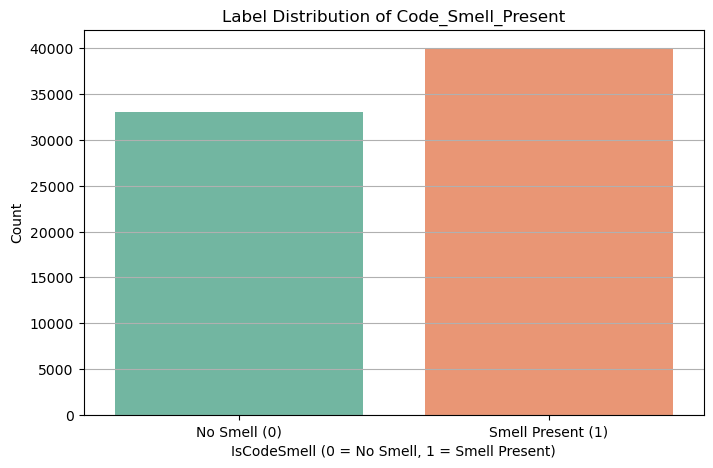

IsCodeSmell
1    40028
0    33063
Name: count, dtype: int64

In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='IsCodeSmell', palette='Set2')
plt.title('Label Distribution of Code_Smell_Present')
plt.xlabel('IsCodeSmell (0 = No Smell, 1 = Smell Present)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Smell (0)', 'Smell Present (1)'])
plt.grid(axis='y')
plt.show()
df['IsCodeSmell'].value_counts()

# **Split features and target**

In [4]:
X = df.drop(columns=['IsCodeSmell'])
y = df['IsCodeSmell']

## **Split into Train and Test**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Evaluate Function**

In [7]:
def evaluate_model(model, X_test, y_test, model_name='Model'):
    """
    Trains and evaluates the given model, and displays performance metrics.
    """

   # Make predictions on training data
    y_train_pred = model.predict(X_train)

    # Make predictions on test data
    y_test_pred = model.predict(X_test)

    # Calculate and display metrics for training data
    print(f"--- Performance of {model_name} on Training Data ---")
    print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
    print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

    # Calculate and display metrics for test data
    print(f"\n--- Performance of {model_name} on Test Data ---")
    print("Testing Accuracy Score:", accuracy_score(y_test, y_test_pred))
    print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))

    # Confusion Matrix for Training Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Training Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion Matrix for Test Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Testing Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC Score for Test Data
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

# **Random Forest**

Feature Importances:
      Feature  Importance
18       LOCC    0.194358
8        CRIX    0.151003
23       NOAM    0.078956
22        NOA    0.065962
39        WOC    0.059912
38        WMC    0.057312
26        NOM    0.050840
27       NOPA    0.038655
1         AMW    0.035587
12     FANOUT    0.029424
37        TCC    0.025954
5         CBO    0.023318
9         DAC    0.018082
2        ATFD    0.016509
10        DIT    0.016011
7          CM    0.014493
36       PNAS    0.013587
13        FDP    0.012995
30     NTempF    0.012697
20      NAbsM    0.011877
6          CC    0.011772
28     NProtM    0.010308
19        NAS    0.009264
24        NOD    0.007197
25       NODD    0.006310
4         BUR    0.005322
16        HIT    0.004786
14     GREEDY    0.003848
31       NrBM    0.003085
3        BOvM    0.002752
29     NSPECM    0.002346
33       NrFE    0.001944
35       NrSS    0.001305
34       NrIC    0.000789
0    ABUSEINH    0.000525
21        NDU    0.000523
32       NrEC    

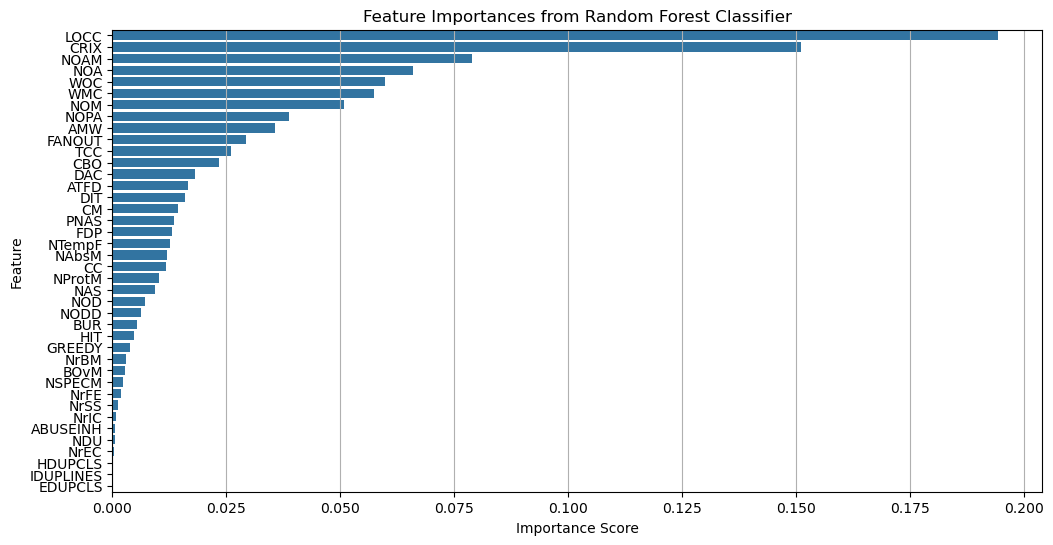

Cross-Validation Scores: [0.86917486 0.86720821 0.86924919 0.86882162 0.87378143]
Mean Cross-Validation Score: 0.8696470603203406
--- Performance of Random Forest Classifier on Training Data ---
Training Accuracy Score: 0.996083595567109
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     26511
           1       1.00      1.00      1.00     31961

    accuracy                           1.00     58472
   macro avg       1.00      1.00      1.00     58472
weighted avg       1.00      1.00      1.00     58472


--- Performance of Random Forest Classifier on Test Data ---
Testing Accuracy Score: 0.8675696012039127
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      6552
           1       0.89      0.86      0.88      8067

    accuracy                           0.87     14619
   macro avg       0.87      0.87      0.87    

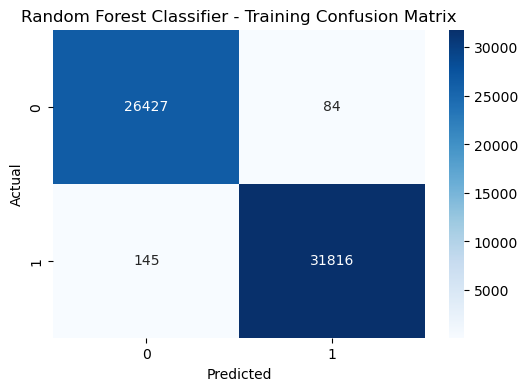

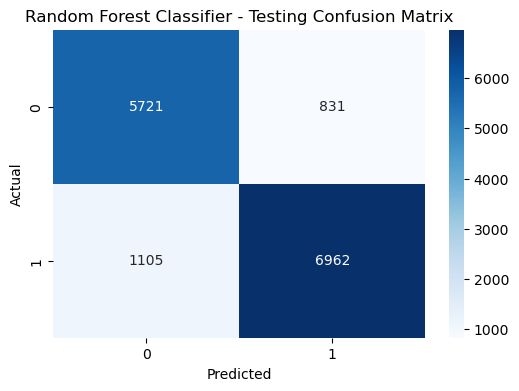

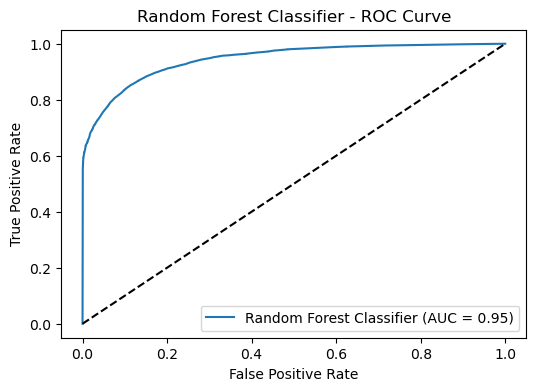

In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()




# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


evaluate_model(rf_model, X_test, y_test, model_name='Random Forest Classifier')

# **Gradient Boosting**


Feature Importances for Gradient Boosting Classifier:
      Feature  Importance
8        CRIX    0.631481
18       LOCC    0.264354
38        WMC    0.041483
20      NAbsM    0.017172
1         AMW    0.008389
26        NOM    0.006047
22        NOA    0.005521
12     FANOUT    0.004690
9         DAC    0.003488
24        NOD    0.002701
10        DIT    0.002268
36       PNAS    0.002256
7          CM    0.002022
39        WOC    0.001945
37        TCC    0.001774
5         CBO    0.001135
16        HIT    0.000861
25       NODD    0.000715
33       NrFE    0.000587
19        NAS    0.000270
27       NOPA    0.000189
28     NProtM    0.000165
29     NSPECM    0.000119
21        NDU    0.000105
31       NrBM    0.000078
2        ATFD    0.000063
13        FDP    0.000061
34       NrIC    0.000054
4         BUR    0.000006
32       NrEC    0.000000
3        BOvM    0.000000
35       NrSS    0.000000
14     GREEDY    0.000000
30     NTempF    0.000000
15    HDUPCLS    0.000000
23       

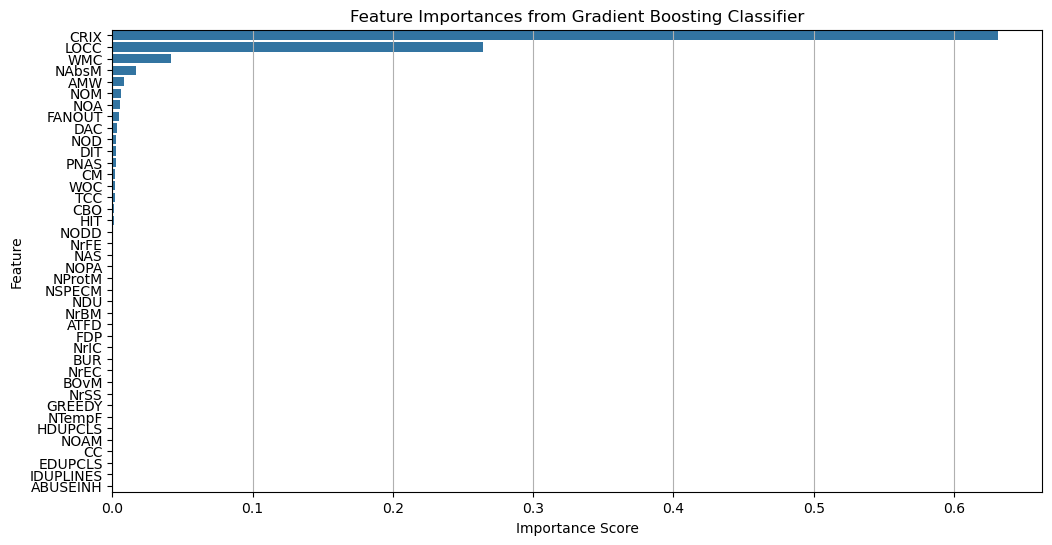

Cross-Validation Scores (Gradient Boosting): [0.85386917 0.85746045 0.85719172 0.85633658 0.86035574]
Mean Cross-Validation Score (Gradient Boosting): 0.8570427342290398
--- Performance of Gradient Boosting Classifier on Training Data ---
Training Accuracy Score: 0.8599671637706937
Training Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85     26511
           1       0.89      0.84      0.87     31961

    accuracy                           0.86     58472
   macro avg       0.86      0.86      0.86     58472
weighted avg       0.86      0.86      0.86     58472


--- Performance of Gradient Boosting Classifier on Test Data ---
Testing Accuracy Score: 0.8546412203297079
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      6552
           1       0.89      0.84      0.86      8067

    accuracy                           0.85     1461

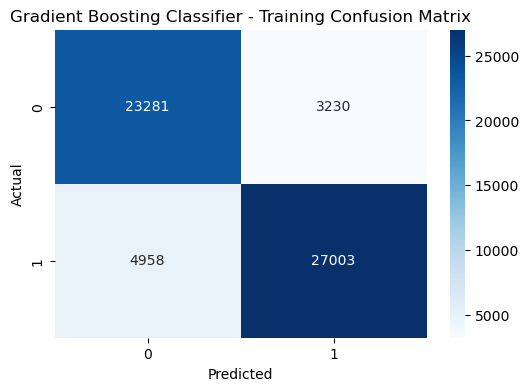

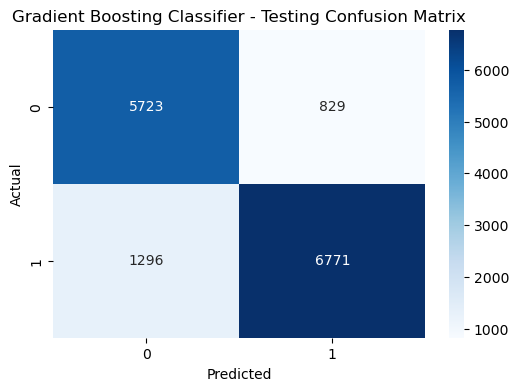

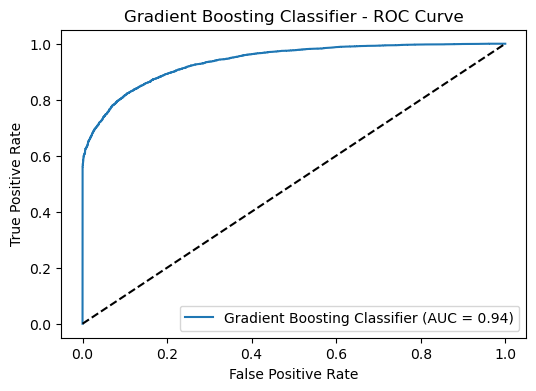

In [16]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
importances = gb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("\nFeature Importances for Gradient Boosting Classifier:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Gradient Boosting Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

# Perform cross-validation for Gradient Boosting
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (Gradient Boosting):", cv_scores_gb)
print("Mean Cross-Validation Score (Gradient Boosting):", np.mean(cv_scores_gb))


evaluate_model(gb_model, X_test, y_test, model_name='Gradient Boosting Classifier')


# **Logistic Regression**

d:\Apps\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Apps\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

Cross-Validation Scores (Logistic Regression): [0.80273621 0.80632749 0.80511373 0.80648196 0.8073371 ]
Mean Cross-Validation Score (Logistic Regression): 0.8055992976962127
--- Performance of Logistic Regression on Training Data ---
Training Accuracy Score: 0.8079764673689971
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.80     26511
           1       0.88      0.75      0.81     31961

    accuracy                           0.81     58472
   macro avg       0.81      0.81      0.81     58472
weighted avg       0.82      0.81      0.81     58472


--- Performance of Logistic Regression on Test Data ---
Testing Accuracy Score: 0.8066899240714139
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80      6552
           1       0.88      0.75      0.81      8067

    accuracy                           0.81     14619
   macro avg

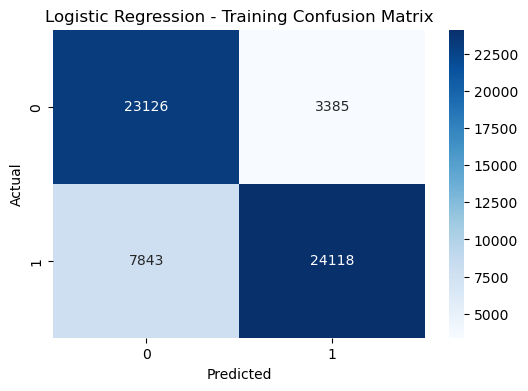

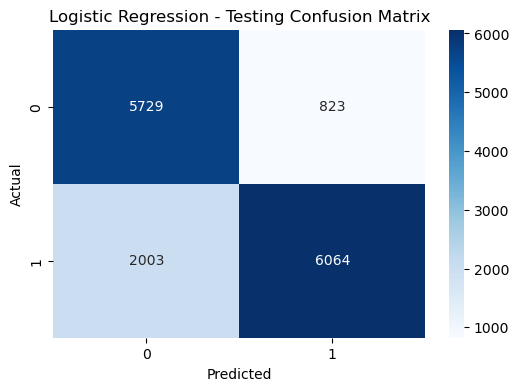

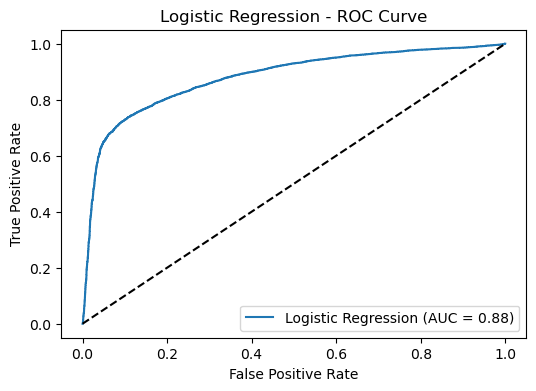

In [17]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (Logistic Regression):", cv_scores_lr)
print("Mean Cross-Validation Score (Logistic Regression):", np.mean(cv_scores_lr))

evaluate_model(lr_model, X_test, y_test, model_name='Logistic Regression')

# **Multi-Layer Perceptron (MLP)**

d:\Apps\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores (MLP): [0.86028217 0.85592133 0.86061228 0.85847443 0.86001368]
Mean Cross-Validation Score (MLP): 0.859060779827163
--- Performance of Multi-Layer Perceptron (MLP) Classifier on Training Data ---
Training Accuracy Score: 0.9022267067998359
Training Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89     26511
           1       0.92      0.90      0.91     31961

    accuracy                           0.90     58472
   macro avg       0.90      0.90      0.90     58472
weighted avg       0.90      0.90      0.90     58472


--- Performance of Multi-Layer Perceptron (MLP) Classifier on Test Data ---
Testing Accuracy Score: 0.8630549285176825
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      6552
           1       0.88      0.86      0.87      8067

    accuracy                           0.86     14619
   ma

d:\Apps\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


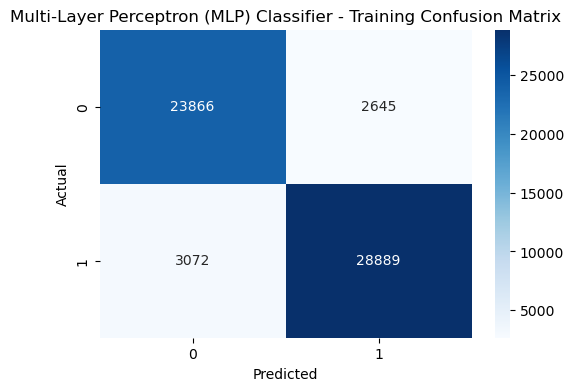

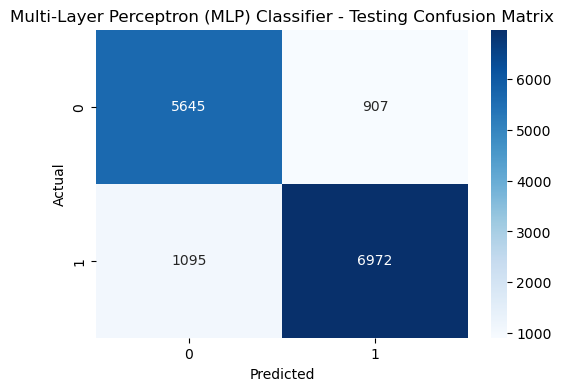

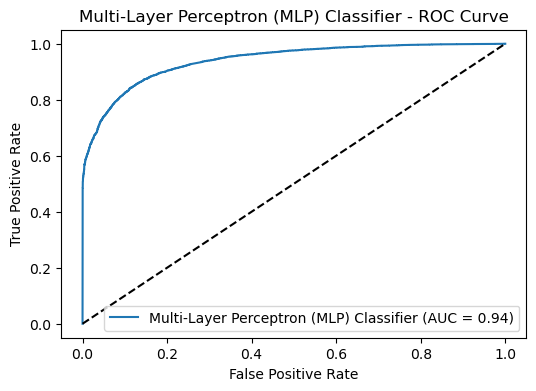

In [11]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
cv_scores_mlp = cross_val_score(mlp_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (MLP):", cv_scores_mlp)
print("Mean Cross-Validation Score (MLP):", np.mean(cv_scores_mlp))

evaluate_model(mlp_model, X_test, y_test, model_name='Multi-Layer Perceptron (MLP) Classifier')


# **AdaBoost Classifier**

d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Feature Importances for AdaBoost Classifier:
      Feature  Importance
18       LOCC        0.22
8        CRIX        0.16
20      NAbsM        0.12
38        WMC        0.12
33       NrFE        0.08
34       NrIC        0.04
12     FANOUT        0.04
9         DAC        0.04
39        WOC        0.04
27       NOPA        0.02
31       NrBM        0.02
10        DIT        0.02
37        TCC        0.02
22        NOA        0.02
16        HIT        0.02
26        NOM        0.02
28     NProtM        0.00
29     NSPECM        0.00
30     NTempF        0.00
7          CM        0.00
32       NrEC        0.00
3        BOvM        0.00
35       NrSS        0.00
36       PNAS        0.00
2        ATFD        0.00
4         BUR        0.00
24        NOD        0.00
25       NODD        0.00
23       NOAM        0.00
21        NDU        0.00
1         AMW        0.00
19        NAS        0.00
5         CBO        0.00
17  IDUPLINES        0.00
15    HDUPCLS        0.00
14     GREEDY     

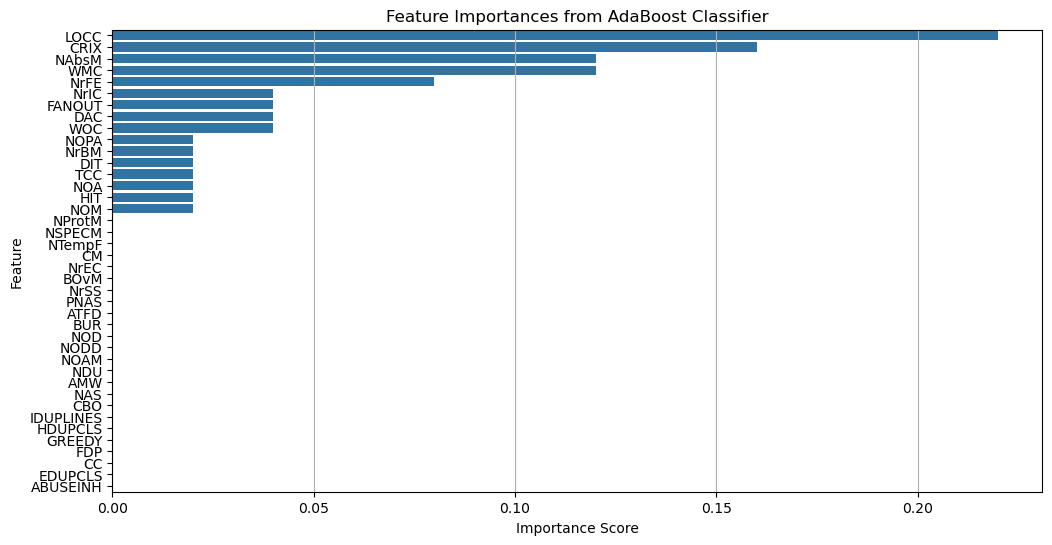

d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\skle

Cross-Validation Scores (AdaBoost): [0.8387345  0.84395041 0.84487772 0.84342398 0.84077305]
Mean Cross-Validation Score (AdaBoost): 0.8423519294525725
--- Performance of AdaBoost Classifier on Training Data ---
Training Accuracy Score: 0.8456013134491722
Training Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84     26511
           1       0.88      0.83      0.85     31961

    accuracy                           0.85     58472
   macro avg       0.84      0.85      0.85     58472
weighted avg       0.85      0.85      0.85     58472


--- Performance of AdaBoost Classifier on Test Data ---
Testing Accuracy Score: 0.8392502907175593
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      6552
           1       0.88      0.82      0.85      8067

    accuracy                           0.84     14619
   macro avg       0.84      0.84 

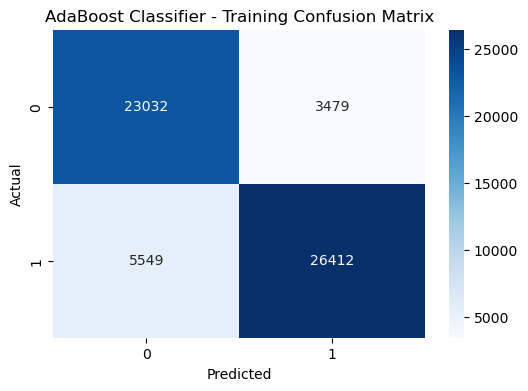

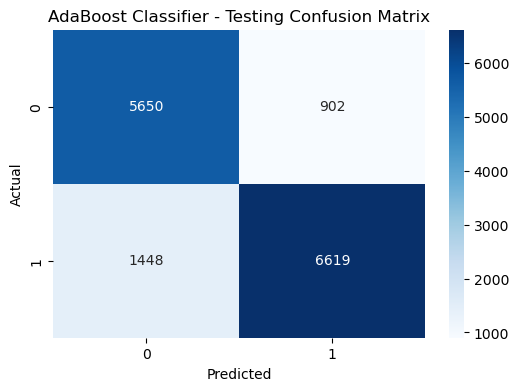

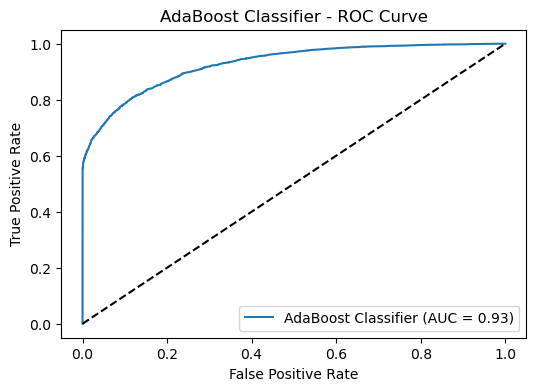

In [19]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
importances = ada_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("\nFeature Importances for AdaBoost Classifier:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from AdaBoost Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

# Perform cross-validation for AdaBoost
cv_scores_ada = cross_val_score(ada_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (AdaBoost):", cv_scores_ada)
print("Mean Cross-Validation Score (AdaBoost):", np.mean(cv_scores_ada))


evaluate_model(ada_model, X_test, y_test, model_name='AdaBoost Classifier')
